## Installing Required Libraries: If required

In [647]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

## Importing Required Libraries

In [648]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
pd.options.display.float_format = '{:.2f}'.format

## Starting with Checkpoint 1
### Reading the Company Dataset

In [649]:
# Reading Companies and Rounds2 File
companies = pd.read_table("companies.txt", encoding = "ISO-8859-1")

### Exploring Companies Dataset

In [650]:
# Checking shape of data
companies.shape

(66368, 10)

In [651]:
# Printing the first 5 rows
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [652]:
# Printing the last 5 rows
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


### Exploring the Null Values

In [653]:
# Checking Number of Null Values in each column
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [654]:
# Checking Percentage of number of Null Values in each column
(companies.isnull().sum()/companies.shape[0])*100

permalink        0.00
name             0.00
homepage_url     7.62
category_list    4.74
status           0.00
country_code    10.48
state_code      12.88
region          12.10
city            12.10
founded_at      22.93
dtype: float64

In [655]:
# Changing all the column values to lower case so that during join nothing is missed out
companies["permalink"] = companies["permalink"].apply(lambda x: x.lower())

### Identifying unique column which can be used to join with rounds2 dataset

-> The "permalink" column has all values unique in each. Hence it can be used as primary key to join.

-> There are 66368 unique companies

In [656]:
# Checking number of unique values in permalink column
companies.permalink.nunique()
# From Output its clear that permalink column has all unique values. 
# So this can be used to join

66368

## Reading rounds2 dataset

In [657]:
rounds = pd.read_csv("rounds2.csv", index_col = False, encoding = "ISO-8859-1")

In [658]:
## Checking Null values in each column of rounds2
(rounds.isnull().sum()/rounds.shape[0])*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

In [659]:
# Changing the column value to lower case to join with companies data set
rounds["company_permalink"] = rounds["company_permalink"].apply(lambda x: x.lower())

### Identifying unique companies in  rounds2 dataset

-> There are 66373 unique companies

In [660]:
# Finding number of unique companies in rounds2 dataset
rounds.company_permalink.nunique()
# So, there are 66373 unique companies in rounds2 dataset

66373

In [661]:
# Printing the top 5 rows
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [662]:
# Printing the shape
rounds.shape

(114949, 6)

### Joining Companies and Rounds2 data set to create master frame

In [663]:
# Joining rounds2 and companies dataset
master = companies.merge(rounds, how= "inner", left_on="permalink", right_on= "company_permalink")

In [664]:
# Prinitng top 5 rows
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


## Identifying how many companies of `rounds 2` are not in companies dataset

There are 73 companies which are in rounds2 dataset but not in companies

In [665]:
# Finding how many companies of rounds2 are not in companies dataset
print(rounds.company_permalink.nunique())
print(master.company_permalink.nunique())
## From Output its clear that there are 73 companies in rounds2 dataset which are not present in companies dataset

66373
66300


## Identifying how many companies of `companies dataset` are not in rounds2 dataset

There are 68 companies which are in rounds2 dataset but not in companies

In [666]:
# Finding how many companies of companies2 are not in rounds2 dataset
print(companies.permalink.nunique())
print(master.company_permalink.nunique())
## From Output its clear that there are 68 companies in companies dataset which are not present in rounds2 dataset

66368
66300


## Checking the number of rows in master data frame

There are 114875 rows in master data frame

In [667]:
## Shape of Master Frame
master.shape[0]

114875

## Checkpoint 1 Completed:
### Solutions are summarised in below cell

-> How many unique companies are present in rounds2?
###### 66373

-> How many unique companies are present in the companies file?
###### 66368

-> In the companies data frame, which column can be used as the unique key for each company? 
###### permalink

-> Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
###### Yes, Total 73 companies

-> Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
###### 114875


## Processing the Master Data Frame for further analysis

-> Treating Null Values

-> Checking for Outliers

In [668]:
## Number of Null Values in Each Column
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
dtype: int64

In [669]:
# Checking percentage of null values in each column
master.isnull().sum()/master.shape[0]*100

permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.95
status                     0.00
country_code               7.52
state_code                 9.49
region                     8.81
city                       8.81
founded_at                17.84
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.90
funded_at                  0.00
raised_amount_usd         17.38
dtype: float64

In [670]:
## Printing top 5 rows
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


## Dropping rows having Country Code as Null

-> There are around 7.5% rows in master data frame where country code is NULL

-> Imputing country code with Mode value( which is USA) is not good Idea since this will result in biased data.

-> Its better to drop these rows, since percentage is very less and we will not lose much data

In [671]:
## Dropping Country Code with Null Values
master = master.dropna(subset=["country_code"])

In [672]:
# Checking percentage of null values in each column
master.isnull().sum()/master.shape[0]*100

permalink                  0.00
name                       0.00
homepage_url               4.28
category_list              1.63
status                     0.00
country_code               0.00
state_code                 2.13
region                     1.40
city                       1.40
founded_at                15.81
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.15
funded_at                  0.00
raised_amount_usd         16.15
dtype: float64

## Dropping rows having Category_list as Null

-> There are around 1.6% rows left in remainign master data frame where category is NULL

-> Its better to drop these rows, since at a whole we are not losing much data

-> So, we dropped 7.5% rows where country was Null along with 1.5% additional rows where category is NULL

In [673]:
#Dropping all the rows where category is null
master = master.dropna(subset=["category_list"])

In [674]:
## Dropping all the non-required columns
## These columns are not required for our analysis
master = master.drop(["name", "homepage_url", "company_permalink", "funding_round_permalink", "state_code",\
            "region", "city", "founded_at", "funding_round_code"], axis = 1)

In [675]:
# Checking percentage of null values in each column
master.isnull().sum()/master.shape[0]*100

permalink             0.00
category_list         0.00
status                0.00
country_code          0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd    15.31
dtype: float64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


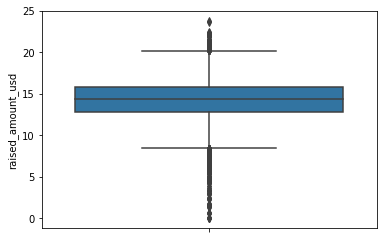

In [676]:
## Checking the distribution of raised_amount columns
sns.boxplot(y = np.log(master["raised_amount_usd"]), orient = "v")

In [677]:
## Checking IQR score for raised_amount column
q1 = master["raised_amount_usd"].quantile(0.25)
q3 = master["raised_amount_usd"].quantile(0.75)
iqr = q3-q1
len(master.loc[(master["raised_amount_usd"] > ( q1 - (1.5*q1))) & (master["raised_amount_usd"] > ( q3 + (1.5*q3))), "raised_amount_usd"])

## There are around 9805 values which are outside the standard interquartile range

9805

## Filling the missing values in raised_amount column

-> Since there are too many outliers, its obvious that data is skewed.

-> In that case imouting the values with Median is good

In [678]:
## Filling missing value with median
master["raised_amount_usd"] = master["raised_amount_usd"].fillna(master.raised_amount_usd.median())

In [679]:
### Checking Null values in each column
master.isnull().sum()

permalink             0
category_list         0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
dtype: int64

In [680]:
# Printing shape of master frame after dropping Null values of country and category
master.shape

(104504, 7)

In [681]:
# Checking the number of unique companies left after dropping Null values of country and category
master.permalink.nunique()
## There are 57776 companies left for analysis

57776

## Starting with Checkpoint 2

In [682]:
## Checking value counts of unique values of Funding_round_type to see the if there is any mismatch of 
## uppercase and lower case

In [683]:
## From output it looks like all values are ok
master["funding_round_type"].value_counts()

venture                  52019
seed                     26427
debt_financing            6701
angel                     5417
undisclosed               3958
equity_crowdfunding       2967
private_equity            2055
grant                     1997
convertible_note          1630
post_ipo_equity            608
product_crowdfunding       351
post_ipo_debt              151
non_equity_assistance      136
secondary_market            87
Name: funding_round_type, dtype: int64

#### Average Funding Amount when Funding_Round_type is Venture

In [684]:
## Average amount
master[master["funding_round_type"] == "venture"]["raised_amount_usd"].mean()

10920738.942001961

#### Average Funding Amount when Funding_Round_type is Angel

In [685]:
## Average amount
master[master["funding_round_type"] == "angel"]["raised_amount_usd"].mean()

1127104.508214879

#### Average Funding Amount when Funding_Round_type is seed

In [686]:
## Average amount
master[master["funding_round_type"] == "seed"]["raised_amount_usd"].mean()

960505.517690241

#### Average Funding Amount when Funding_Round_type is private_equity

In [687]:
## Average amount
master[master["funding_round_type"] == "private_equity"]["raised_amount_usd"].mean()

65689073.00291971

### Checkpoint 2 Completed

-> Average funding amount of venture type

###### 10920738.942


-> Average funding amount of angel type

###### 1127104.508


-> Average funding amount of seed type

###### 960505.517


-> Average funding amount of private equity type

###### 65689073.002


-> Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

###### Venture

Because average raised amount in venture is around 11 million USD which is the only one lying in range specified by Spark funds 


### Starting with Checkpoint 3

Filtering the best invesyment type along with top 3 english speaking countries

In [688]:
## Filtering the best invesyment type
best_invest = master[master["funding_round_type"] == "venture"]

In [689]:
## Checking how many rows are present for best funding round(venture)
best_invest.shape

(52019, 7)

In [690]:
## Printing the top 5 rows
best_invest.head()

,permalink,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,Media,operating,IND,venture,05-01-2015,10000000.00
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,14-10-2014,1800000.00
4,/organization/0-6-com,Curated Web,operating,CHN,venture,19-03-2008,2000000.00
5,/organization/004-technologies,Software,operating,USA,venture,24-07-2014,1800000.00
8,/organization/0ndine-biomedical-inc,Biotechnology,operating,CAN,venture,21-12-2009,719491.00


In [691]:
## Getting the total raised amount for each country
country_amount = best_invest.groupby("country_code").agg({"raised_amount_usd": "sum"}).reset_index()

In [692]:
## Sorting the countries based on total raised amount in descending order and 
## selecting the top 9 countries with highest raised funding amount
top9 = country_amount.sort_values(by= "raised_amount_usd", ascending= False).head(9)

In [693]:
## Printing the top9 countries with the total amount raised by them
top9

,country_code,raised_amount_usd
100,USA,423831829342.00
16,CHN,40244318773.00
31,GBR,20476013004.00
41,IND,14558508718.00
13,CAN,9635217668.00
30,FRA,7314656960.00
44,ISR,7054150477.00
23,DEU,6699721981.00
47,JPN,3237847127.00


### Checkpoint 3 completed

### From the link provided in the module we found the top 3 English speaking countries from above data frame which are given below:

1. Top English-speaking country

##### USA

2. Second English-speaking country

##### GBR

3. Third English-speaking country

##### IND

### Starting with Checkpoint 4

Extracting the Primary sector from Category_list and  creating a new column for that in Mastr Data Frame

In [694]:
## Printing the top 5 rows
master.head()

,permalink,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,Media,operating,IND,venture,05-01-2015,10000000.00
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,14-10-2014,1800000.00
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,01-03-2014,700000.00
4,/organization/0-6-com,Curated Web,operating,CHN,venture,19-03-2008,2000000.00
5,/organization/004-technologies,Software,operating,USA,venture,24-07-2014,1800000.00


In [695]:
## Cleaning the data to get the primary sector and creating a new column : "primary_sector"
## converting the primary sector to lower case to join with main sector data frame
master["primary_sector"] = master["category_list"].apply(lambda x: str(x).split("|")[0].lower())

In [696]:
## Dropping the "category_list" as its not required now.
## We will be using "primary_sector" from now on everywhere
master.drop("category_list", axis = 1, inplace= True)

In [697]:
## Printing the top 5 rows
master.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,operating,IND,venture,05-01-2015,10000000.00,media
1,/organization/-qounter,operating,USA,venture,14-10-2014,1800000.00,application platforms
2,/organization/-qounter,operating,USA,seed,01-03-2014,700000.00,application platforms
4,/organization/0-6-com,operating,CHN,venture,19-03-2008,2000000.00,curated web
5,/organization/004-technologies,operating,USA,venture,24-07-2014,1800000.00,software


In [698]:
## Checking number of null values if any in primary sector
master["primary_sector"].isnull().sum()

0

In [699]:
## Checking number of unique values in Primary sector
master.primary_sector.nunique()

721

In [700]:
## Checking value counts in Primary sector
master.primary_sector.value_counts()

biotechnology             10176
software                   6640
advertising                4616
e-commerce                 4452
analytics                  3460
curated web                3454
mobile                     3148
health care                2972
enterprise software        2851
clean technology           2699
hardware + software        2123
apps                       2002
health and wellness        1949
games                      1912
finance                    1828
education                  1579
manufacturing              1287
cloud computing            1228
semiconductors             1201
android                    1040
security                    885
consulting                  869
internet                    824
big data                    766
automotive                  760
web hosting                 695
social media                682
entertainment               665
hospitality                 662
fashion                     607
                          ...  
taxis   

In [701]:
## Reading the main sectors from mapping.csv file
main_sector = pd.read_csv("mapping.csv", index_col = False)

In [702]:
## Printing the top 5 rows of main sector
main_sector.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [703]:
## Checking number of unique values in main sector
main_sector.category_list.nunique()

687

In [704]:
print(main_sector.category_list)

0                             NaN
1                              3D
2                     3D Printing
3                   3D Technology
4                      Accounting
5                Active Lifestyle
6                    Ad Targeting
7              Advanced Materials
8                Adventure Travel
9                     Advertising
10          Advertising Exchanges
11           Advertising Networks
12          Advertising Platforms
13                         Advice
14                      Aerospace
15                    Agriculture
16          Air Pollution Control
17                     Algorithms
18                    All Markets
19                   All Students
20            Alter0tive Medicine
21                         Alumni
22                       A0lytics
23                        Android
24                         Angels
25                    Animal Feed
26     Anything Capital Intensive
27                  App Discovery
28                  App Marketing
29            

In [705]:
## After seeing the above values of categories in main sector, its obvious that 
## "na" in each category is written as "0". Rest everything looks fine
## converting case to lower as well for joining with master frame
main_sector["category_list"] = main_sector["category_list"].apply(lambda x: str(x).replace("0", "na").lower())

In [706]:
## Checking the if "0" is replaced with "na"
main_sector.category_list

0                             nan
1                              3d
2                     3d printing
3                   3d technology
4                      accounting
5                active lifestyle
6                    ad targeting
7              advanced materials
8                adventure travel
9                     advertising
10          advertising exchanges
11           advertising networks
12          advertising platforms
13                         advice
14                      aerospace
15                    agriculture
16          air pollution control
17                     algorithms
18                    all markets
19                   all students
20           alternative medicine
21                         alumni
22                      analytics
23                        android
24                         angels
25                    animal feed
26     anything capital intensive
27                  app discovery
28                  app marketing
29            

In [707]:
## Merging the master dataframe with main_sector data frame
master_new = master.merge(main_sector, how="left", left_on="primary_sector", right_on= "category_list").drop("category_list", axis = 1)

In [708]:
## Dropping the "Blanks" column since its not required
master_new.drop("Blanks", axis=1, inplace= True)

In [709]:
## Checking the shape after merging the data frame
master_new.shape

(104504, 15)

In [710]:
## Printing the top 5 rows of new master data frame
master_new.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,operating,IND,venture,05-01-2015,10000000.00,media,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,/organization/-qounter,operating,USA,venture,14-10-2014,1800000.00,application platforms,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,/organization/-qounter,operating,USA,seed,01-03-2014,700000.00,application platforms,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,/organization/0-6-com,operating,CHN,venture,19-03-2008,2000000.00,curated web,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,/organization/004-technologies,operating,USA,venture,24-07-2014,1800000.00,software,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [711]:
## Creating a single column for main sector

master_new["main_sector"] = master_new[["Automotive & Sports", "Cleantech / Semiconductors", "Entertainment", "Health", "Manufacturing", \
           "News, Search and Messaging", "Others", "Social, Finance, Analytics, Advertising"]].idxmax(1)

## Dropping all the non required columns

master_new = master_new.drop(["Automotive & Sports", "Cleantech / Semiconductors", "Entertainment", "Health", "Manufacturing", \
           "News, Search and Messaging", "Others", "Social, Finance, Analytics, Advertising"], axis=1)

### Checkpoint 4 Completed

-> Mapped each primary sector with main_sector

-> Merged both data frames

-> Shape of new master data frame: (104504, 15)

### Starting with Checkpoint 4

Creating 3 data frames for countries IND, GBR and USA and selecting the funding type as "venture"

In [712]:
## Creating data frame for USA
d1_usa = master_new.loc[(master_new["funding_round_type"] == "venture") & (master_new["country_code"] == "USA"),:]
## Creating data frame for IND
d3_ind = master_new.loc[(master_new["funding_round_type"] == "venture") & (master_new["country_code"] == "IND"),:]
## Creating data frame for GBR
d2_gbr = master_new.loc[(master_new["funding_round_type"] == "venture") & (master_new["country_code"] == "GBR"),:]

In [713]:
## Checking the shape of each data frame
print(d1_usa.shape)
print(d3_ind.shape)
print(d2_gbr.shape)

(38034, 8)
(984, 8)
(2265, 8)


#### Starting with country USA (C1)

In [714]:
## Printing top 5 rows
d1_usa.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/-qounter,operating,USA,venture,14-10-2014,1800000.00,application platforms,"News, Search and Messaging"
4,/organization/004-technologies,operating,USA,venture,24-07-2014,1800000.00,software,Others
9,/organization/0xdata,operating,USA,venture,09-11-2015,20000000.00,analytics,"Social, Finance, Analytics, Advertising"
10,/organization/0xdata,operating,USA,venture,03-01-2013,1700000.00,analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,operating,USA,venture,19-07-2014,8900000.00,analytics,"Social, Finance, Analytics, Advertising"


In [715]:
## Filtering the data frame based on raised amount: The required range is 5 Million to 15 Million
d1 = d1_usa[(d1_usa["raised_amount_usd"] >= 5000000) & (d1_usa["raised_amount_usd"] <= 15000000)]

In [716]:
## Checking the shape after filtering the raised amount
d1.shape

(12064, 8)

In [717]:
## Printing top 5 rows
d1.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
11,/organization/0xdata,operating,USA,venture,19-07-2014,8900000.00,analytics,"Social, Finance, Analytics, Advertising"
21,/organization/1-mainstream,acquired,USA,venture,17-03-2015,5000000.00,apps,"News, Search and Messaging"
92,/organization/128-technology,operating,USA,venture,16-12-2014,11999347.00,service providers,Others
99,/organization/1366-technologies,operating,USA,venture,15-10-2013,15000000.00,manufacturing,Manufacturing
100,/organization/1366-technologies,operating,USA,venture,09-04-2015,5000000.00,manufacturing,Manufacturing


In [718]:
## Checking if there are any Null values in the final USA country data frame
d1.isnull().sum()
## Seems like there is single row which is not mapped to any of the main sector

permalink             0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
primary_sector        0
main_sector           1
dtype: int64

In [719]:
## Checking which row is not mapped to any of the main sector
d1[d1.main_sector.isnull()]

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
39699,/organization/healthtell,operating,USA,venture,13-06-2014,9486929.00,biotechnology and semiconductor,NaN


In [720]:
## Dropping the row where main sectors is Null
d1 = d1.loc[d1["primary_sector"] != "biotechnology and semiconductor"]

In [721]:
d1.shape

(12063, 8)

In [722]:
## Counting the Number of investments in each of main sector
d1["main_sector"].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [723]:
## Total amount of Investment in USA
d1["raised_amount_usd"].sum()

107757097294.0

In [724]:
## Top Sector for US: Others
## Second best sector for US: Social, Finance, Analytics, Advertising

In [725]:
## Amount raised in "Others" Sector:
d1.loc[(d1["main_sector"] == "Others") & (d1["raised_amount_usd"] == d1["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
168,15000000.00,/organization/1stdibs


In [726]:
## Amount raised in "Social, Finance, Analytics, Advertising" Sector:
d1.loc[(d1["main_sector"] == "Social, Finance, Analytics, Advertising") & (d1["raised_amount_usd"] == d1["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
2310,15000000.00,/organization/admeld


### Summary for country C1 (USA)

 1. Total number of investments (count)
 
###### 12063
  
 2. Total amount of investment (USD)
 
###### 107757097294 USD

 3. Top sector (based on count of investments)
 
###### Others

 4. Second-best sector (based on count of investments)
 
###### Social, Finance, Analytics, Advertising

 5. Third-best sector (based on count of investments)
 
###### Cleantech / Semiconductors

 6. Number of investments in the top sector (refer to point 3)
 
###### Others: 2950

 7. Number of investments in the second-best sector (refer to point 4)
 
###### Social, Finance, Analytics, Advertising:  2714

 8. Number of investments in the third-best sector (refer to point 5)
 
###### Cleantech / Semiconductors:  2350

 9. For the top sector count-wise (point 3), which company received the highest investment?
 
###### /organization/1stdibs

10. For the second-best sector count-wise (point 4), which company received the highest investment?

###### /organization/admeld


###########################################################

#### Starting with Country GBR(C2)

In [727]:
d2_gbr.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
27,/organization/10-minutes-with,operating,GBR,venture,09-10-2014,4000000.00,education,Others
327,/organization/31dover,operating,GBR,venture,01-03-2014,2274716.00,e-commerce,Others
356,/organization/365scores,operating,GBR,venture,29-09-2014,5500000.00,android,"Social, Finance, Analytics, Advertising"
357,/organization/365scores,operating,GBR,venture,28-01-2013,1200000.00,android,"Social, Finance, Analytics, Advertising"
492,/organization/3sun,operating,GBR,venture,03-03-2014,15152514.00,clean technology,Cleantech / Semiconductors


In [728]:
## Filtering the data frame based on raised amount: The required range is 5 Million to 15 Million
d2 = d2_gbr[(d2_gbr["raised_amount_usd"] >= 5000000) & (d2_gbr["raised_amount_usd"] <= 15000000)]

In [729]:
## Printing top 5 rows
d2.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
356,/organization/365scores,operating,GBR,venture,29-09-2014,5500000.00,android,"Social, Finance, Analytics, Advertising"
773,/organization/7digital,acquired,GBR,venture,01-01-2008,8468328.00,content creators,Entertainment
774,/organization/7digital,acquired,GBR,venture,19-10-2012,10000000.00,content creators,Entertainment
843,/organization/90min,operating,GBR,venture,06-10-2015,15000000.00,media,Entertainment
844,/organization/90min,operating,GBR,venture,07-05-2013,5800000.00,media,Entertainment


In [730]:
## Checking if there are any Null values in the final USA country data frame
d2.isnull().sum()
## There are no Null values

permalink             0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
primary_sector        0
main_sector           0
dtype: int64

In [731]:
d2.shape

(621, 8)

In [732]:
## Counting the Number of investments in each of main sector
d2["main_sector"].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [733]:
## Total amount of Investment in GBR
d2["raised_amount_usd"].sum()

5379078691.0

In [734]:
## Top Sector for GBR: Others
## Second best sector for GBR: Social, Finance, Analytics, Advertising

In [735]:
## Amount raised in "Others" Sector:
d2.loc[(d2["main_sector"] == "Others") & (d2["raised_amount_usd"] == d2["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
9139,15000000.00,/organization/azure-solutions


In [736]:
## Amount raised in "Social, Finance, Analytics, Advertising" Sector:
d2.loc[(d2["main_sector"] == "Social, Finance, Analytics, Advertising") & (d2["raised_amount_usd"] == d2["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
59508,15000000.00,/organization/mythings


### Summary for country C2 (GBR)

 1. Total number of investments (count)
 
###### 621
  
 2. Total amount of investment (USD)
 
###### 5379078691 USD

 3. Top sector (based on count of investments)
 
###### Others

 4. Second-best sector (based on count of investments)
 
###### Social, Finance, Analytics, Advertising

 5. Third-best sector (based on count of investments)
 
###### Cleantech / Semiconductors

 6. Number of investments in the top sector (refer to point 3)
 
###### Others: 147

 7. Number of investments in the second-best sector (refer to point 4)
 
###### Social, Finance, Analytics, Advertising:  133

 8. Number of investments in the third-best sector (refer to point 5)
 
###### Cleantech / Semiconductors:  130

 9. For the top sector count-wise (point 3), which company received the highest investment?
 
###### /organization/azure-solutions

10. For the second-best sector count-wise (point 4), which company received the highest investment?

###### /organization/mythings


###########################################################

#### Starting with Country C3(IND)

In [737]:
d3_ind.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,operating,IND,venture,05-01-2015,10000000.00,media,Entertainment
31,/organization/1000lookz,operating,IND,venture,22-07-2013,1800000.00,beauty,Health
201,/organization/21diamonds-india,operating,IND,venture,15-11-2012,6369507.00,e-commerce,Others
237,/organization/247-learning-private,operating,IND,venture,06-11-2007,4000000.00,edtech,Others
440,/organization/3dsoc,operating,IND,venture,01-12-2007,1240000.00,3d,Manufacturing


In [738]:
## Filtering the data frame based on raised amount: The required range is 5 Million to 15 Million
d3 = d3_ind[(d3_ind["raised_amount_usd"] >= 5000000) & (d3_ind["raised_amount_usd"] <= 15000000)]

In [739]:
## Printing top 5 rows
d3.head()

,permalink,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,operating,IND,venture,05-01-2015,10000000.00,media,Entertainment
201,/organization/21diamonds-india,operating,IND,venture,15-11-2012,6369507.00,e-commerce,Others
941,/organization/a-little-world,operating,IND,venture,09-09-2008,6410000.00,finance,"Social, Finance, Analytics, Advertising"
2289,/organization/adlabs-imagica,operating,IND,venture,28-10-2014,8180000.00,entertainment,Entertainment
3146,/organization/agile,operating,IND,venture,01-05-2011,5740000.00,finance,"Social, Finance, Analytics, Advertising"


In [740]:
## Checking if there are any Null values in the final USA country data frame
d3.isnull().sum()
## There are no Null values

permalink             0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
primary_sector        0
main_sector           0
dtype: int64

In [741]:
d3.shape

(328, 8)

In [742]:
## Counting the Number of investments in each of main sector
d3["main_sector"].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [743]:
## Total amount of Investment in GBR
d3["raised_amount_usd"].sum()

2949543602.0

In [744]:
## Top Sector for GBR: Others
## Second best sector for GBR: Social, Finance, Analytics, Advertising

In [745]:
## Amount raised in "Others" Sector:
d3.loc[(d3["main_sector"] == "Others") & (d3["raised_amount_usd"] == d3["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
15575,15000000.00,/organization/caratlane


In [746]:
## Amount raised in "Social, Finance, Analytics, Advertising" Sector:
d3.loc[(d3["main_sector"] == "Social, Finance, Analytics, Advertising") & (d3["raised_amount_usd"] == d3["raised_amount_usd"].max()), ["raised_amount_usd", "permalink"]].head(1)

,raised_amount_usd,permalink
5791,15000000.00,/organization/apnaloan


### Summary for country C3 (IND)

 1. Total number of investments (count)
 
###### 328
  
 2. Total amount of investment (USD)
 
###### 2949543602 USD

 3. Top sector (based on count of investments)
 
###### Others

 4. Second-best sector (based on count of investments)
 
###### Social, Finance, Analytics, Advertising

 5. Third-best sector (based on count of investments)
 
###### News, Search and Messaging

 6. Number of investments in the top sector (refer to point 3)
 
###### Others: 110

 7. Number of investments in the second-best sector (refer to point 4)
 
###### Social, Finance, Analytics, Advertising:  60

 8. Number of investments in the third-best sector (refer to point 5)
 
###### Cleantech / Semiconductors:  52

 9. For the top sector count-wise (point 3), which company received the highest investment?
 
###### /organization/caratlane

10. For the second-best sector count-wise (point 4), which company received the highest investment?

###### /organization/apnaloan


###########################################################

### Checkpoint 5 Completed

Definitely Spark funds should invest in either USA, GBR or IND but mostly in USA.

The sector common among all three countries "Social, Finance, Analytics, Advertising"

### Starting with Checkpoint 6

##### -> Plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type

In [747]:
## Calculating the fraction of total investment in "venture", "seed" and "private_equity" funding type (In Percentage)
vent_frac = (master_new.loc[master_new["funding_round_type"] == "venture", "raised_amount_usd"].sum() / master_new.raised_amount_usd.sum())*100
seed_frac = (master_new.loc[master_new["funding_round_type"] == "seed", "raised_amount_usd"].sum() / master_new.raised_amount_usd.sum())*100
equity_frac = (master_new.loc[master_new["funding_round_type"] == "private_equity", "raised_amount_usd"].sum() / master_new.raised_amount_usd.sum())*100

In [748]:
## Calculating the average investment in "venture", "seed" and "private_equity" funding type ( In Millions)
vent_avg = master_new.loc[master_new["funding_round_type"] == "venture", "raised_amount_usd"].mean()/1000000
seed_avg = master_new.loc[master_new["funding_round_type"] == "seed", "raised_amount_usd"].mean()/1000000
equity_avg = master_new.loc[master_new["funding_round_type"] == "private_equity", "raised_amount_usd"].mean()/1000000

In [749]:
### Creating a data frame having both fraction and average for "venture", "seed" and "private_equity" funding type 
temp = dict()
temp["fraction"] = [vent_frac, seed_frac, equity_frac]
temp["average"] = [vent_avg, seed_avg, equity_avg]
temp["fund_type"] = ["venture", "seed", "private_equity"]
plot_fund = pd.DataFrame(temp)

In [750]:
## Checking the rows of data frame
plot_fund.head()

,fraction,average,fund_type
0,59.42,10.92,venture
1,2.66,0.96,seed
2,14.12,65.69,private_equity


In [751]:
## Melting the data frame to generate dual y-axis plot
plot_fund_melted = pd.melt(plot_fund, id_vars="fund_type", var_name="type", value_name="value")

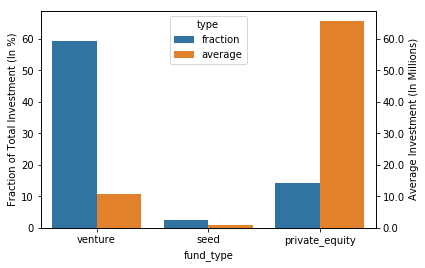

In [752]:
## Code to generate the plot
## This Plot gives clear idea in which funding tyoe to invest
fig, ax1 = plt.subplots()
g = sns.barplot(x="fund_type", y="value", hue="type", data=plot_fund_melted, ax=ax1)
# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Fraction of Total Investment (In %)')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks(),1))
ax2.set_ylabel('Average Investment (In Millions)')

plt.show()

-> From above graph its clear that most of the the investments around 60% has happened under `venture` funding type. 

-> Also the average investment under `venture` is around 10 Million which is under required range of 5 to 15 Million

###### -> Plot showing the top 9 countries against the total amount of investments of funding type FT. 

In [753]:
## Marking the countries with English as official language using the link provided in Module
## Raised amount is converted in Billions
top9["Official_Language_English"] = ["Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
top9["raised_amount_billions"] = top9["raised_amount_usd"]/1000000000

In [754]:
top9.head(9)

,country_code,raised_amount_usd,Official_Language_English,raised_amount_billions
100,USA,423831829342.00,Yes,423.83
16,CHN,40244318773.00,No,40.24
31,GBR,20476013004.00,Yes,20.48
41,IND,14558508718.00,Yes,14.56
13,CAN,9635217668.00,Yes,9.64
30,FRA,7314656960.00,Yes,7.31
44,ISR,7054150477.00,Yes,7.05
23,DEU,6699721981.00,Yes,6.70
47,JPN,3237847127.00,No,3.24


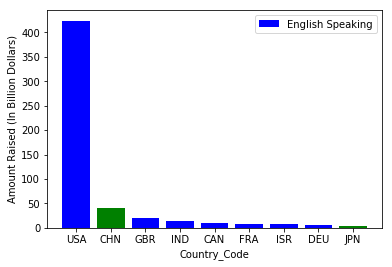

In [767]:
## Creating a separate bar color for English speaking countries
## generating the plot
clrs = ["blue" if (x == "Yes") else "green" for x in top9["Official_Language_English"]]
plt.bar(data= top9, x= "country_code", height="raised_amount_billions", color = clrs)
plt.gca().legend(("English Speaking",))
plt.xlabel("Country_Code")
plt.ylabel("Amount Raised (In Billion Dollars)")
plt.show()

###### -> Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

##### Top 3 English Speaking Countries:

1.) USA

2.) GBR

3.) IND

In [609]:
## Getting top 3 sectors for each of the top 3 countries
## For USA
us_sector = pd.DataFrame(d1["main_sector"].value_counts())[:3].reset_index()
us_sector = us_sector.rename(columns = {"index":"main_sector", "main_sector":"Number of Investments"})
us_sector["country"] = "USA"
## For GBR
gbr_sector = pd.DataFrame(d2["main_sector"].value_counts())[:3].reset_index()
gbr_sector = gbr_sector.rename(columns = {"index":"main_sector", "main_sector":"Number of Investments"})
gbr_sector["country"] = "GBR"
## For IND
ind_sector = pd.DataFrame(d3["main_sector"].value_counts())[:3].reset_index()
ind_sector = ind_sector.rename(columns = {"index":"main_sector", "main_sector":"Number of Investments"})
ind_sector["country"] = "IND"

In [613]:
## Merging the above three data frame
plot_sector = us_sector.append(gbr_sector).append(ind_sector)

In [614]:
plot_sector

,main_sector,Number of Investments,country
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA
0,Others,147,GBR
1,"Social, Finance, Analytics, Advertising",133,GBR
2,Cleantech / Semiconductors,130,GBR
0,Others,110,IND
1,"Social, Finance, Analytics, Advertising",60,IND
2,"News, Search and Messaging",52,IND


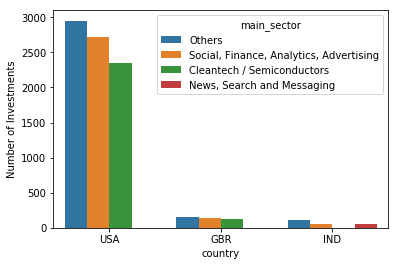

In [769]:
## Generating the plot for Top 3 sectors for top 3 english speaking countries
g = sns.barplot(x="country", y="Number of Investments", hue="main_sector", data=plot_sector)
plt.show()